In [76]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
#test
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [14]:
data = boston.data
target = boston.target
#(# rows, #features)

(506,)

In [16]:
num_features = len(boston.feature_names)
num_samples = data.shape[0]

In [22]:
#panda stores data in a dataframe
bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names

In [23]:
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
bos_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
#normalize data
#for each feature, calculate the mean and the maximum
for i in range(num_features):
    feature_avg = np.mean(data[:,i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i] - feature_avg)/feature_max 

In [32]:
weights_init = np.random.uniform(low = -1, high = 1, size = num_features)
bias_init = 0

In [28]:
print(weights_init)

[-0.24535855  0.72445734  0.81171527 -0.35671952 -0.80515547  0.48490625
  0.78634461  0.79871992  0.51584962 -0.80675765 -0.13322602 -0.67397401
 -0.58536048]


In [29]:
def hypothesis(weights, bias):
    #weighted sum + bias = predictions
    return data.dot(weights) + np.repeat(bias, num_samples)

In [33]:
hypothesis(weights_init, bias_init)

array([ -7.85398401e-01,  -4.17856756e-01,  -4.16524421e-01,
        -5.61778408e-01,  -5.35579706e-01,  -5.26959724e-01,
        -5.73557581e-01,  -4.39582366e-01,  -6.43168379e-01,
        -4.54349712e-01,  -4.51459722e-01,  -4.28238757e-01,
        -8.86800486e-01,  -2.62697589e-01,  -7.88586171e-02,
        -3.24805500e-01,  -5.05578794e-01,  -2.23117268e-01,
        -4.31910454e-01,  -2.94306684e-01,  -2.40521319e-01,
        -1.59953415e-01,  -2.45018932e-01,  -2.04572254e-01,
        -1.60709305e-01,  -9.96936150e-02,  -1.27709250e-01,
        -7.11224668e-02,  -4.00959990e-02,  -7.14339383e-02,
        -2.57347099e-01,  -1.44847983e-02,  -2.52556252e-01,
        -1.72712771e-01,   6.24880960e-03,  -4.07147849e-01,
        -4.75157364e-01,  -6.05726332e-01,  -7.25333611e-01,
        -1.41820680e+00,  -1.39776099e+00,  -9.03823385e-01,
        -9.20994500e-01,  -9.73531334e-01,  -7.24233952e-01,
        -8.48240889e-01,  -9.31367616e-01,  -5.33703654e-01,
        -7.39344847e-01,

In [36]:
def cost(weights, bias):
    #MSE
    return np.mean(np.square(hypothesis(weights, bias) - target))/2
cost(weights_init, bias_init)

299.49933639967065

In [47]:
def gradient(weights, bias):
    #for each weight, calculate gradient and store
    weights_gradients = []
    #index, value
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights,bias) - target) * data[:, weight_num])
        weights_gradients.append(grad)
    
    weights_gradients = np.array(weights_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weights_gradients, bias_gradient)

In [48]:
LEARNING_RATE = 0.01

def gradient_descent(weights, bias, num_epochs):
    costs = []
    
    for i in range(num_epochs):
        weights_gradients, bias_gradient = gradient(weights, bias)
        #training
        weights = weights - LEARNING_RATE * weights_gradients
        bias = bias - LEARNING_RATE * bias_gradient
        costs.append(cost(weights, bias))
    
    return costs, weights, bias

In [74]:
costs, trained_weights, trained_bias = gradient_descent(weights_init, bias_init, 1000)

In [75]:
costs[-1]

22.774816044195557

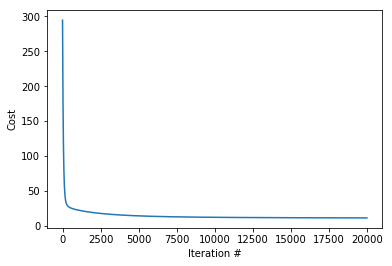

In [72]:
plt.plot(costs)
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.show()

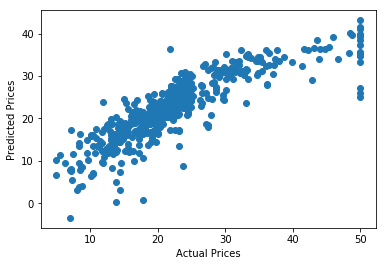

In [73]:
plt.scatter(target, hypothesis(trained_weights, trained_bias))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [62]:
regr = linear_model.LinearRegression()

In [65]:
regr.fit(data, target)
print(mean_squared_error(target, regr.predict(data)))

21.8977792177


In [89]:
#test
x_train, x_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.25, random_state=5)
print(x_train.shape)
print(x_test.shape)

(379, 13)
(127, 13)


In [85]:
print(y_train.shape)
print(y_test.shape)

(379,)
(127,)


In [91]:
regr.fit(x_train, y_train)
mean_squared_error(y_test, regr.predict(x_test))

24.298105768439303

In [92]:
mean_squared_error(y_train, regr.predict(x_train))

21.51471273218505

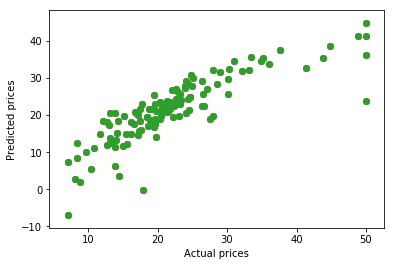

In [95]:
plt.scatter(y_test, regr.predict(x_test))
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()